# FBU for ttbarAC
Unfold results from the charge asymmetry analysis using FBU.

In [1]:
# enable your grid access (using the terminal)
!xrdcp root://cmsxrootd.fnal.gov//store/user/demarley/lpc/unfolding-hats/hists.root ~

[6.628kB/6.628kB][100%][==================================================][6.628kB/s]  


In [2]:
import numpy as np
import fbu
import uproot
import utils

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Load data from the ROOT file using `uproot`

In [3]:
f = uproot.open("/home/dmarley/hists.root")

Within the file are the different histograms necessary for the unfolding.

In [6]:
uresmat = f['resmat_p']     # response matrix
uttbar  = f['ttbar']      # ttbar
uwjets  = f['wjets']      # w+jets
ustop   = f['singletop']  # single top
utruth  = f['truth']      # MC truth distribution

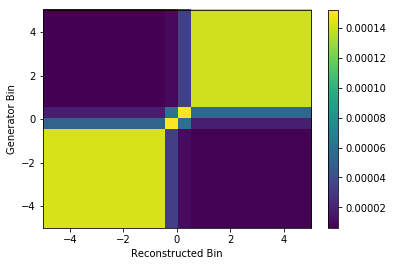

In [9]:
response = uresmat.numpy
utils.plotResponseMatrix(response[0],bins=response[1])

Run FBU!

In [10]:
myfbu = fbu.PyFBU()

In [12]:
myfbu.data     = uttbar.numpy[0]
myfbu.response = response[0].tolist()

unf_truth = utruth.numpy[0]
myfbu.lower = [i*0.2 for i in unf_truth]   # lower bound on hyperbox
myfbu.upper = [2*i for i in unf_truth]     # upper bound on hyperbox
myfbu.nMCMC = 200000        # number of samplings
myfbu.monitoring = False    # diagnostics

In [13]:
myfbu.run()

Assigned Metropolis to truth0
Assigned Metropolis to truth1
Assigned Metropolis to truth2
Assigned Metropolis to truth3
100%|██████████| 201000/201000 [03:37<00:00, 923.64it/s]


Retrieve the N-dimensional posterior distribution in the form of a list of N arrays.

In [14]:
trace = myfbu.trace
print "> Trace = ",trace 
print "> Size of trace     = ",len(trace)
print "> Entries per trace = ",len(trace[0])

> Trace =  [array([21541797, 21434531, 21401466, ..., 22178563, 22178563, 22286754]), array([15868501, 16033249, 15849333, ..., 16335216, 16440123, 16475785]), array([17668247, 17913832, 17747827, ..., 15926011, 15926011, 16502752]), array([20455932, 21471222, 21471222, ..., 21954797, 22570518, 22570518])]
> Size of trace     =  4
> Entries per trace =  200000


Each array corresponds to the projection of the posterior distribution for a given bin.

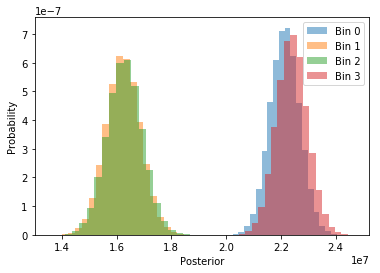

In [15]:
utils.plotPosteriors(trace)

For each unfolded bin, we can extract the mean and RMS.

In [16]:
utils.printPosteriors(trace)

 > Bin 0: 22144767.38 ± 540299.85
 > Bin 1: 16241265.61 ± 627007.90
 > Bin 2: 16290006.55 ± 642614.02
 > Bin 3: 22400888.52 ± 563348.46


In [34]:
neg = sum( np.mean(unf_truth[i]) for i in range(2))
pos = sum( np.mean(unf_truth[i]) for i in range(2,4) )

truth_ac = (pos-neg)/(pos+neg)
print truth_ac

0.003893320592006658


In [26]:
def computeAC(bins):
    halfn = len(bins)/2
    Npos = sum(bins[halfn:])
    Nneg = sum(bins[:halfn])
    return float(Npos-Nneg)/(Npos+Nneg)

In [28]:
unfacs = [computeAC(bins) for bins in zip(*trace)]
ac     = np.mean(unfacs)
acerr  = np.std(unfacs)
print ac,acerr

0.00395487476778984 0.0129653010726881


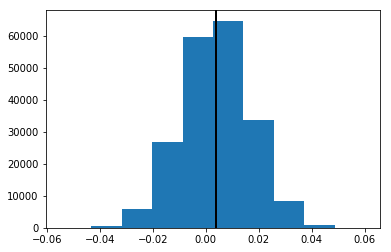

In [37]:
import matplotlib.pyplot as plt
plt.hist(unfacs)
plt.axvline(x=truth_ac,color='k',lw=2)

In [18]:
print " > Bin 0: {0}".format(unf_truth[0]-np.mean(trace[0]))
print " > Bin 1: {0}".format(unf_truth[1]-np.mean(trace[1]))
print " > Bin 0: {0}".format(unf_truth[2]-np.mean(trace[2]))
print " > Bin 1: {0}".format(unf_truth[3]-np.mean(trace[3]))

 > Bin 0: 5770.62192
 > Bin 1: -6860.60958
 > Bin 0: -8989.554145
 > Bin 1: 3095.477325


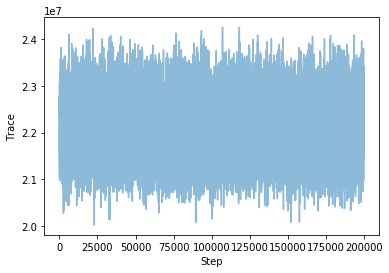

In [19]:
utils.plotTrace([trace[0]])

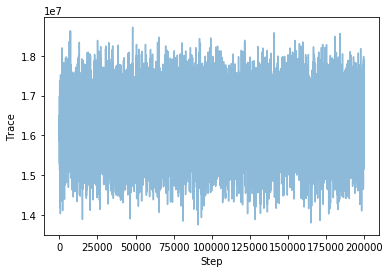

In [20]:
utils.plotTrace([trace[1]])